# Colors of the Stars

## Are all stars “red hot”?


Activity inspired from a notebook from S. Singleton and the manual from the libraries `colour-science`

Please first make sure that the following packages are properly installed on your python workspace

In [1]:
pip install colour

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install colour.plotting

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement colour.plotting (from versions: none)
ERROR: No matching distribution found for colour.plotting


In [3]:
pip install -q colour-science

Note: you may need to restart the kernel to use updated packages.


### Context

In the early part of this century, the director of the Harvard College Observatory, [E. C Pickering](https://en.wikipedia.org/wiki/Edward_C._Pickering) and his collaborators, [Williamina P. S. Flemming](https://en.wikipedia.org/wiki/Williamina_Fleming), [Antonia C. Maury](https://en.wikipedia.org/wiki/Antonia_Maury), and [Annie J. Cannon](https://en.wikipedia.org/wiki/Annie_Jump_Cannon), began a large study of nearly a quarter of a million stars. The result of their survey was a stellar classification system [https://en.wikipedia.org/wiki/Stellar_classification](https://en.wikipedia.org/wiki/Stellar_classification). Under this scheme, stars are classified into seven lettered categories that describe the surface temperature of a star: O, B, A, F, G, K, M. Class O stars are hottest, while class M stars are coolest. The Sun is a class G star, with a surface temperature of about 5,800 Kelvin. The table below summarizes the stellar classes and a temperature range that defines each.

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">Surface Temperature (K)</th>
<th scope="col" class="org-left">Class</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">30,000</td>
<td class="org-left">O</td>
</tr>


<tr>
<td class="org-left">11,000-30,000</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">7,500-11,000</td>
<td class="org-left">A</td>
</tr>


<tr>
<td class="org-left">6,000-7,500</td>
<td class="org-left">F</td>
</tr>


<tr>
<td class="org-left">5,000-6,000</td>
<td class="org-left">G</td>
</tr>


<tr>
<td class="org-left">3,500-5,000</td>
<td class="org-left">K</td>
</tr>


<tr>
<td class="org-left">3,500</td>
<td class="org-left">M</td>
</tr>
</tbody>
</table>

As a first step in understanding what the color of stars tells us, we will focus upon objects that emit or give off radiation, such as stars and heated solids, and also those that do not emit visible light. We will consider the color and temperature of these objects and answer the question, **Are all red objects "red hot"?**



In [4]:
%matplotlib inline

In [5]:
import random
import pandas as pd 

In [6]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np 

# First observation : Visualizing the colors of the spectrum 

In [24]:
import colour
from colour.plotting import *
from colour.plotting import plot_chromaticity_diagram_CIE1931
from colour.plotting.temperature import *

In [25]:
import sys
sys.path.append('colour')

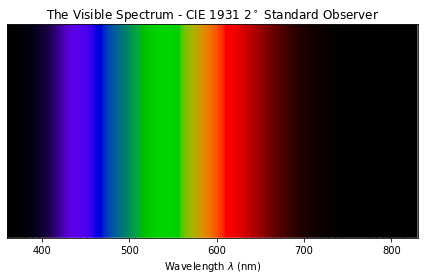

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df1d6d6b08>)

In [26]:
plot_visible_spectrum('CIE 1931 2 Degree Standard Observer')

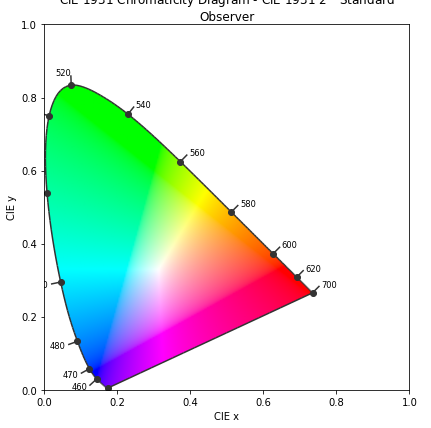

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df1d81a508>)

In [27]:
plot_chromaticity_diagram_CIE1931()

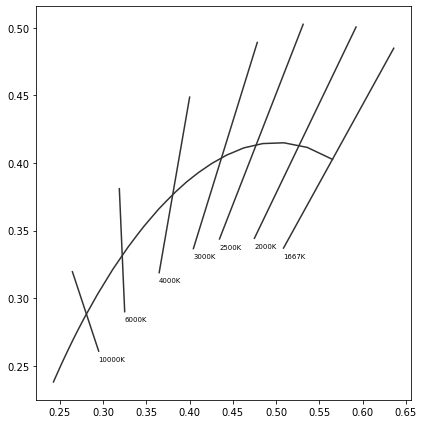

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1df1ebe07c8>)

In [28]:
plot_planckian_locus() 

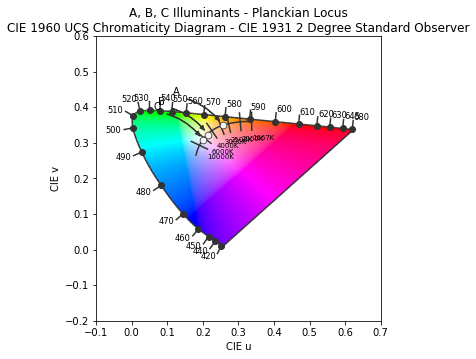

In [29]:
planck, ax =plot_planckian_locus_in_chromaticity_diagram_CIE1960UCS(['A', 'B', 'C'])

In [30]:
planck.set_figheight(14)

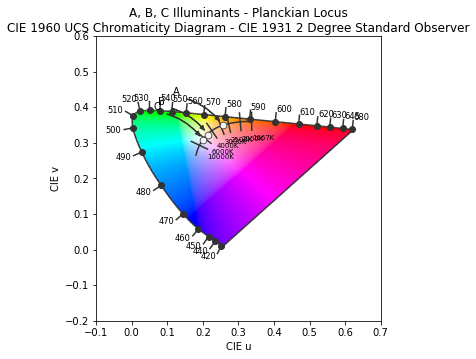

<bound method Figure.get_figwidth of <Figure size 432x432 with 1 Axes>>

In [31]:
planck, ax =plot_planckian_locus_in_chromaticity_diagram_CIE1960UCS(['A', 'B', 'C'])
planck.get_figwidth

In [32]:
planck.set_figwidth(21)
planck.set_figheight(23)
planck.set_dpi(220)

planck.suptitle("""Example of Colorimetric plot""", fontweight ="bold") 
planck.get_figwidth

<bound method Figure.get_figwidth of <Figure size 4620x5060 with 1 Axes>>

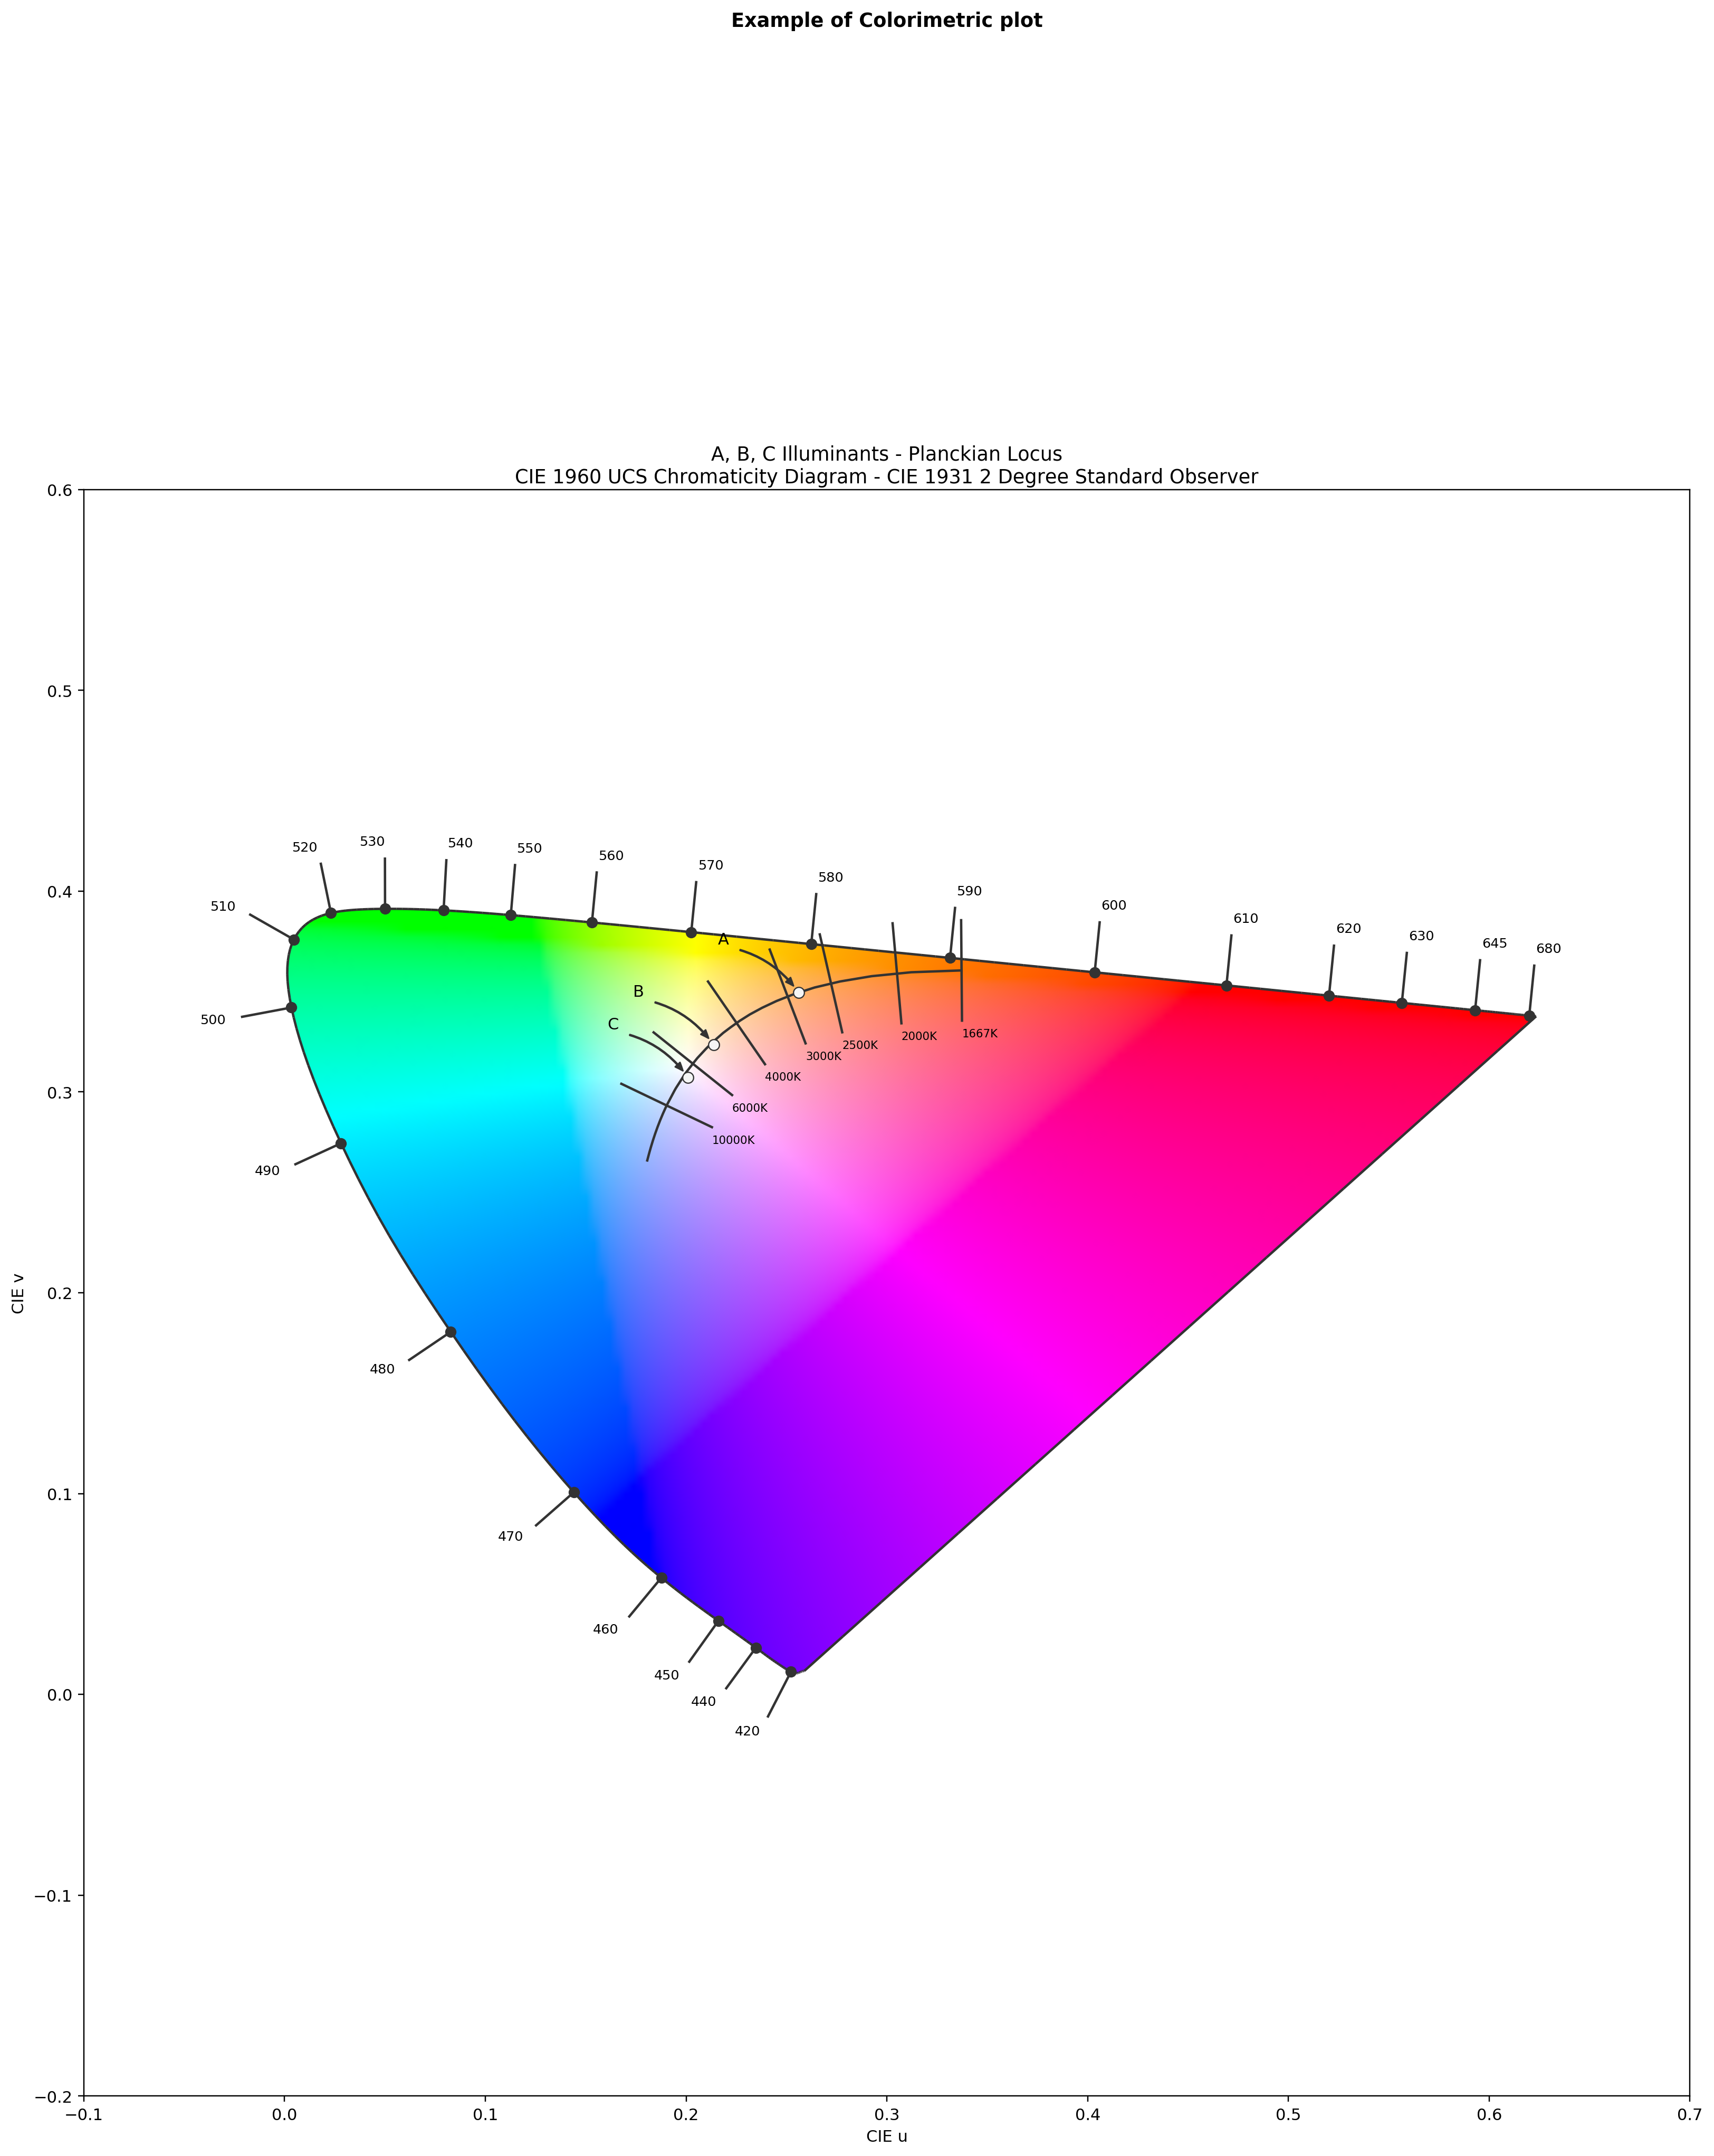

In [33]:
planck

#### Question 0:

From the plots above state a law that relates the color of a star to the energy that is beeing radiated by such stars

Answer 0:


# Models for Black Body Radiation



## [Rayleigh-Jeans](https://en.wikipedia.org/wiki/Rayleigh%E2%80%93Jeans_law)


A *classical* model suggesting a blackbody radiator can have any energy.

\begin{equation}
B_\lambda = \frac{2ckT}{\lambda^4}
\end{equation}

## [Planck](https://en.wikipedia.org/wiki/Max_Planck#Black-body_radiation)

A *quantized* model suggesting a blackbody radiator comprises oscillators of discrete energies.

\begin{equation}
  \rho(\lambda, T)\,d\lambda = \frac{8 \pi h c}{\lambda^5
  \left (e^{hc/\lambda kT} -1 \right ) } \,d\lambda
\end{equation}

Plotting these model functions gives these curves:

https://upload.wikimedia.org/wikipedia/commons/1/19/Black_body.svg




In [7]:
# define common constants
from scipy.constants import  Planck, speed_of_light, Boltzmann
h = Planck  # Js
c = speed_of_light  # m/s
kb = Boltzmann  # J/molec K

# use "lamda" to avoid conflict with python reserved word "lambda"
def rho(wavelength, T):
    """Calculate the emission from wavelength and temperature.

    Arguments::
    lamda: wavelength cm
    T: temperature K"""

    return 8 * np.pi * h * c / ( wavelength**5 * (np.exp(h*c/(wavelength*kb*T)) - 1))

#### Question 1

Use the model function `rho()` to plot the predicted emission spectra for a **K-type** star and a **G-type** star from the UV to IR wavelength region (say, 100 to 3000 nm).

Answer 1:


In [8]:
wavelength =np.linspace(1*10**-7, 3*10**-6,1000)

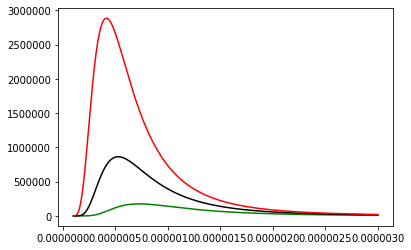

In [9]:
TK = 4000   # temperature of a K-type star
TG = 5500   # temperature of a G-type star
TF = 7000   # temperature of a F-type star
IntensityK = rho(wavelength,TK)
IntensityG = rho(wavelength,TG)
IntensityF = rho(wavelength,TF)

plt.figure()
plt.plot(wavelength,IntensityK,'g-')
plt.plot(wavelength, IntensityG,'k-')
plt.plot(wavelength, IntensityF, 'r-')


## Emission as a function of $\nu$


Alternatively, the blackbody emission can be modeled using frequency $\nu$. Using the relationship $c = \lambda \nu$ to derive the Planck relationship in terms of frequency instead of wavelength.

\begin{equation}
\rho(\nu, T) = \frac{8\pi h \nu^3}{c^3} \frac{1}{e^{h\nu/kt}-1}
\end{equation}

## Question 2
Using Planck's equation for blackbody radiation, write a function called `rhonu` that returns the emission given $\nu$ and $T$. Use this function to plot emission spectra for stars at 4000K and 5000K (including axes). Record your observations. Here is a skeleton to get you started.


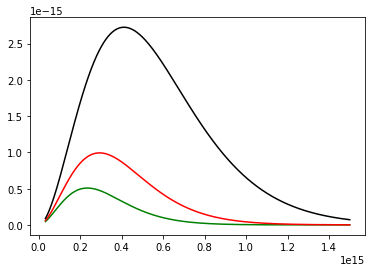

In [10]:
def rhonu(nu, T):
    """Calculates the radiance from frequency and temperature.

    Arguments
    nu: frequency Hz
    T: temperature K
    """

    return  (8 * np.pi * h * nu**3 / c**3) * (1 / (np.exp(h*nu/(kb*T)) - 1))

nu1 = c/200e-9
nu2 = c/900e-8     # frequency


x = np.linspace(nu1,nu2,1000)
y=rhonu(x,4000)

plt.figure()
plt.plot(x,rhonu(x,4000),'g')
plt.plot(x,rhonu(x,5000),'r')
plt.plot(x,rhonu(x,7000),'k')      # Intensity versus frequency


#rhonu(nu,4000)


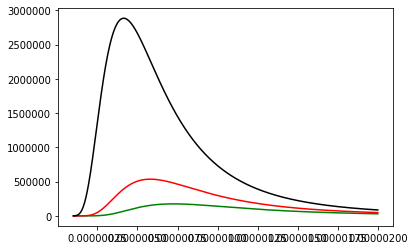

In [11]:
wavelength =np.linspace(100e-9, 2000e-9, 1000)

plt.figure()
plt.plot(wavelength,rho(wavelength, 4000),'g')   # The function for intensity versus wavelength for a K-type star
plt.plot(wavelength,rho(wavelength, 5000),'r')   # The function for intensity versus wavelenght for a G-type star
plt.plot(wavelength,rho(wavelength,7000),'k')    # The function for intensity versus wavelength for a F-type star

In [12]:
from scipy.constants import Planck, speed_of_light, Boltzmann
h =  Planck  #Js
c = speed_of_light   #m.s
kb = Boltzmann    # J/molec K

def rhonu(nu, T):
    """
    Return emission intensity as function of frequency and temperature.
    
    Arguments::
    nu =  frequency Hz
    T =  temperature K
    """
    
    return 2*h*nu**2/c**2 * 1/(np.exp(h*nu/(kb*T)-1))

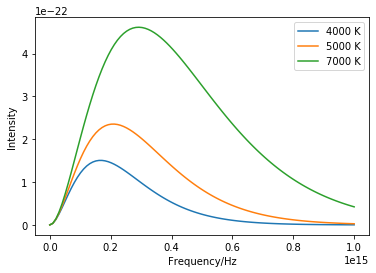

In [13]:
nus = np.linspace(1e10, 1e15, 100)
for T in [4000, 5000, 7000]:
    plt.plot(nus,rhonu(nus, T), label='%s K'%T)
plt.xlabel('Frequency/Hz')
plt.ylabel('Intensity')
plt.legend()

# Second observation: Comparing the temperatures of stars


Text(0.5, 1.0, 'Experimental Analysis of Intensity Plotted against Wavelength /m')

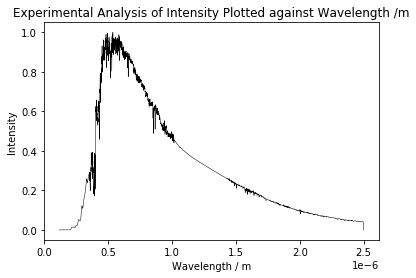

In [14]:
#http://cdsarc.u-strasbg.fr/viz-bin/nph-Plot/w/Vgraph/txt?J%2fPASP%2f110%2f863%2f.%2fukg5iii&--bitmap-size&600x400

fn = './ukg5iii.csv'
G = pd.read_csv(fn, skiprows=3, sep=" ", names=["wavelength", "intensity"])

# convert nanometers to meters
wavelength = G.wavelength / 1e9 

# normalize intensity
em_star = G.intensity / np.max(G.intensity)

plt.plot(wavelength, em_star, 'k', lw=0.5)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Wavelength / m");
plt.ylabel("Intensity")
plt.title("Experimental Analysis of Intensity Plotted against Wavelength /m")

# This is the experimental analysis of the plot of Intensity versus wavelength from the imported data

Text(0.5, 1.0, 'Calculated Results for Intensity Plotted against Wavelength /m')

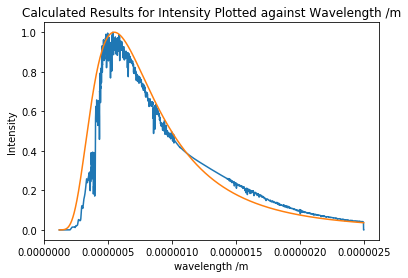

In [15]:
plt.plot(wavelength, em_star)

T = 5300 # temperature of a K-type star

em_calc = rho(wavelength, T)

em_norm = em_calc/np.max(em_calc)

plt.plot(wavelength, em_norm) # This is an overlay of two curves

plt.xlabel("wavelength /m")
plt.ylabel("Intensity")
plt.title("Calculated Results for Intensity Plotted against Wavelength /m")

# I made a normalization curves, while varying the temperature to see if I could get my calculated curve as close as possible to the experimental analysis curve. 
# Then I overlayed my generated curve on the experimental analysis curve.

# Comparing the Planck model to the Wien model

The Wien model is a mathematical relation that predicts the wavelength of a *black body*.

Usual experience shows, that the radiation frequency is related to energy. When an object is heated it changes its color from red to white. 

The Wein equation connects the temperature to the wavelength $\lambda$.

$$ \lambda = \frac{2.8978\,10^{-3}}{T} $$

#### Question 4:

Propose a strategy to compare the abscisse (wavelength) of the maximum intensity given by the **Planck** equation as seen before and the predicted wavelength given from the law of Wien.

Answer 4:

First define a function that returns the wavelength when given a temperature, acording to the Wien equation.

In [16]:
def wien(T):
    "lambda_max for Wein law; T is temperature in K."
    l_max = 2.8978e-3 / T
    return l_max

In [17]:
wavelength = G.wavelength / 1e9 

In [18]:
temps = np.arange(1000,10001,1000)
temp = 2000

planck_list =[]
wien_list = []

#for temp in temps:
y = rho(wavelength, temp)

In [19]:
max_y = np.argmax(y)
max_y

2666

In [20]:
wavelength_max = wavelength[max_y]
planck_list.append(wavelength)


wavelength_max

1.449e-06

In [21]:
rho(wavelength_max,temp)

5493.695521680264

In [22]:
wien(temp)

1.4450000000000001e-06

Text(0, 0.5, ' Wien modeled wavelength in nm')

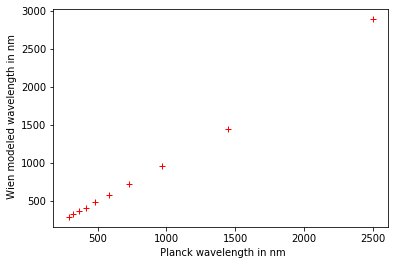

In [23]:
planck_list=[]
wein_list=[]

for temp in temps:
    y = rho(wavelength, temp)
    max_y = np.argmax(y)
    wavelength_max = wavelength[max_y]
    
    planck_list.append(wavelength_max)
    wein_list.append(wien(temp))


plt.plot(np.array(planck_list)*1E9,np.array(wein_list)*1E9,'r+')
plt.xlabel(" Planck wavelength in nm")
plt.ylabel(" Wien modeled wavelength in nm")